$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

# Heisenberg model as a low energy limit of the Hubbard model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import kwant
import openfermion

import sys
sys.path.append('..')
from fermionic_systems import *
from spin_lattices import *

from tqdm.notebook import tqdm

C:\Users\Repair\anaconda3\lib\site-packages\kwant\solvers\default.py:16: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  warnings.warn("MUMPS is not available, "


## Hubbard model

$$H = -t \sum_{<i,j>}\sum_\sigma (c_{i, \sigma}^\dagger c_{j, \sigma}+c_{j, \sigma}^\dagger c_{i, \sigma}) + U \sum_i n_{i, \uparrow}n_{i,_\downarrow}$$

## Heisenberg model

$$H = \sum_{i,j} J_{i,j}\vec{S_i} \cdot \vec{S_j}$$

## Deriving Heisenberg model from the Hubbard model

as described in https://aapt.scitation.org/doi/pdf/10.1119/1.10537

Rewrite Hubbard hamiltonian as a sum
$$H = H_0 + H_1$$
of 
$$H_0 = U \sum_i n_{i, \uparrow}n_{i,_\downarrow}$$
and a small perturbation
$$H_1 = -t \sum_{<i,j>}\sum_\sigma (c_{i, \sigma}^\dagger c_{j, \sigma}+c_{j, \sigma}^\dagger c_{i, \sigma}) = -\sum_{i,j}t_{i,j}c_{i, \sigma}^\dagger c_{j, \sigma}.$$

The unperturbed hamiltonian has eigenstates
$$\ket{\alpha} = c_{\alpha_1}^\dagger c_{\alpha_2}^\dagger ... \ket{0}$$
with energies $nU$ for $n \in \mathbb{N}$ -
$n$ is the number of sites with 2 electrons.
Ground state energy is 0, and the ground state is degenerate -
for a system with $N$ sites, there are $3^N$ orthogonal states with energy 0
(at each site there can be no electrons, a spin up electron or a spin down electron).
In general, the degeneracy of energy $nU$ is ${N \choose n} 3^{N-n}$.

We are only considering the subspace with exactly $N$ electrons.
Then the ground states have exactly one electron at each site.
But the spin can of each electron can be chosen independently, so the degeneracy is still exponential - $2^N$.

First order of perturbation theory:

$$E^{(1)}_\lambda = \bra{\lambda} H_1 \ket{\lambda}$$

We only care about low energies.

Let $\mathcal H_0$ be the subspace of states with $N$ electrons and 0 energy.
It is spanned by
$$\ket\alpha = c^\dagger_{1, \sigma_1} c^\dagger_{2, \sigma_2} ... c^\dagger_{N, \sigma_N} \ket 0.$$

Let's consider one term of $H_1$:
$$T_{i,j} = \sum_\sigma c_{i, \sigma}^\dagger c_{j, \sigma}.$$
There is exactly one electron on both $i$-th and $j$-th site.
If $\sigma_i = \sigma_j$, then $T_{i,j}\ket\alpha = 0$, because
$$T_{i,j}\ket\alpha = \left( c_{i, \sigma_i}^\dagger c_{j, \sigma_i} +  c_{i, -\sigma_i}^\dagger c_{j, -\sigma_i} \right)\ket\alpha = c_{i, \sigma_i}^\dagger c_{j, \sigma_i} \ket\alpha = \pm (2c_{i, \sigma_i}^\dagger )^2 c_{j, \sigma_i} \prod_{l \neq i} c^\dagger_{l, \sigma_l} \ket 0 = 0.$$
If $\sigma_i \neq \sigma_j$,
$$T_{i,j}\ket\alpha =
c^\dagger_{i, \sigma_j} c_{j, \sigma_j} \ket\alpha =
\pm c^\dagger_{i, \sigma_j} c_{j, \sigma_j} c^\dagger_{i, \sigma_i} c^\dagger_{j, \sigma_j}
\prod_{l \neq i,j} c^\dagger_{l, \sigma_l} \ket 0 =
\mp c^\dagger_{i, \sigma_j} c^\dagger_{i, \sigma_i}
\prod_{l \neq i,j} c^\dagger_{l, \sigma_l} \ket 0.$$
So $T_{i,j}\ket\alpha$ has 2 electrons on $i$-th site.
$H_1 \ket\alpha = -\sum_{i,j}t_{i,j}T_{i,j} \ket\alpha$
is a sum of zeros and states with a single pair of electrons, so
$$H_1 \ H_1\ket\alpha = U H_1\ket\alpha.$$
So $H_1\ket\alpha$ is orthogonal to all states with energy 0.
So for all states $\ket\lambda$, $\ket{\lambda'} \in \mathcal H_0$ 
$$\bra{\lambda} H_1 \ket{\lambda'} = 0$$
-- the first correction to energy is 0. 
This is true no matter what basis we choose for this subspace.
Let's choose a basis in which $H_1$ is diagonal, so that we can calculate the second order perturbations.
In this basis
$$E_\lambda^{(2)} =
\sum_{E_\rho^{(0)} \neq E_\lambda^{(0)}} \frac{|\bra\rho H_1 \ket\lambda |^2}{E_\lambda^{(0)} - E_\rho^{(0)}} =
-\sum_{E_\rho^{(0)} \neq 0} \frac{|\bra\rho H_1 \ket\lambda |^2}{E_\rho^{(0)}}.$$
As discussed before $\bra\rho H_1 \ket\lambda \neq 0$
only when $\ket\rho$ has exactly one pair of electrons -- $E_\rho^{(0)} = U$.
So
$$E_\lambda^{(2)} =
\frac{-1}{U} \sum_{E_\rho^{(0)} = U} |\bra\rho H_1 \ket\lambda |^2 = 
\frac{-1}{U}  \bra\lambda H_1 \left( \sum_{E_\rho^{(0)} = U}\ket\rho\bra\rho \right)  H_1 \ket\lambda,$$
where
$$\sum_{E_\rho^{(0)} = U}\ket\rho\bra\rho \equiv \Pi_1 $$
is the projector on the subspace with energy $U$.
But for all $\lambda$, $H_1 \ket\lambda$ lies in that subspace, and the projector just acts as identity.
So the effective second order hamiltonian on the subspace $\mathcal H_0$ is
$$H_{eff} = \Pi_0 \left( H_0 - \frac{1}{U} H_1^2 \right) \Pi_0 = -\frac{1}{U} \Pi_0  H_1^2 \Pi_0.$$

$$H_1^2 =
\sum_{i,j}\sum_{k,l}\sum_{\sigma, \sigma'}
t_{i,j}t_{k,l}
c_{i, \sigma}^\dagger c_{j, \sigma}
c_{k, \sigma'}^\dagger c_{l, \sigma'}$$
The only terms from that sum that will contribute
are those that produce a state with 1 electron at each site when acting on a state with 1 electron at each site --
those in the form
$$c_{a, \sigma}^\dagger c_{b,\sigma} c_{b, \sigma'}^\dagger c_{a, \sigma'}.$$
Therefore
$$\Pi_0 H_1^2 \Pi_0 =
\Pi_0 \sum_{<i,j>}\sum_{\sigma, \sigma'}
|t_{i,j}|^2
c_{i, \sigma}^\dagger c_{j, \sigma}
c_{j, \sigma'}^\dagger c_{i, \sigma'} \Pi_0.$$
Using the anticommutation relations and $i\neq j$:
$$
\sum_{\sigma, \sigma'}
c_{i, \sigma}^\dagger c_{j, \sigma} c_{j, \sigma'}^\dagger c_{i, \sigma'}
= \\ =
\sum_{\sigma, \sigma'}
c_{i, \sigma}^\dagger c_{i, \sigma'}c_{j, \sigma} c_{j, \sigma'}^\dagger 
= \\ =
\sum_{\sigma, \sigma'}
c_{i, \sigma}^\dagger c_{i, \sigma'}\left(\delta_{\sigma, \sigma'} - c_{j, \sigma'}^\dagger c_{j, \sigma} \right) 
= \\ =
\sum_\sigma n_{i, \sigma} -
\sum_{\sigma, \sigma'}
c_{i, \sigma}^\dagger c_{i, \sigma'} c_{j, \sigma'}^\dagger c_{j, \sigma} 
= \\ =
\sum_\sigma \left(
n_{i, \sigma}
- n_{i,\sigma}n_{j, \sigma}
- c_{i, \sigma}^\dagger c_{i, -\sigma} c_{j, -\sigma}^\dagger c_{j, \sigma}
\right)
$$

All states in $\mathcal H_0$ have exactly one electron at each site so
$$\Pi_0 \left( \sum_\sigma n_{i,\sigma} \right) \Pi_0 = \Pi_0 * 1 *\Pi_0 = \Pi_0$$

So the effective hamiltonian is
$$H_{eff} =
\Pi_0
\sum_{i,j}
\frac{t_{i,j}^2}{U}
\sum_\sigma
\left(
n_{i,\sigma}n_{j, \sigma}
+ c_{i, \sigma}^\dagger c_{i, -\sigma} c_{j, -\sigma}^\dagger c_{j, \sigma}
- \frac{1}{2}
\right)
\Pi_0.$$

Now we will rewrite the effective hamiltonian in terms of spin operators.
We have
$$S_i^z = \frac{1}{2} \left(n_{i,\uparrow} - n_{i,\downarrow} \right)$$
$$S_i^+ = c_{i,\uparrow}^\dagger c_{i, \downarrow}$$
$$S_i^- = c_{i,\downarrow}^\dagger c_{i, \uparrow}$$
We immiedietly see that
$$\sum_\sigma
c_{i, \sigma}^\dagger c_{i, -\sigma} c_{j, -\sigma}^\dagger c_{j, \sigma}
=
S_i^+S_j^- + S_i^-S_j^+
$$
The only non-trivial term to rewrite is
$\sum_\sigma n_{i,\sigma}n_{j, \sigma}$.
The usual math trick $a = (a+b)/2 + (a-b)/2$ we rewrite it as
$$\sum_\sigma n_{i,\sigma}n_{j, \sigma}
= \\ =
\frac{1}{2}\left(\sum_\sigma n_{i,\sigma}n_{j, \sigma} + \sum_\sigma n_{i,\sigma}n_{j, -\sigma}\right)
+
\frac{1}{2}\left(\sum_\sigma n_{i,\sigma}n_{j, \sigma} - \sum_\sigma n_{i,\sigma}n_{j, -\sigma}\right)
$$
Using again the fact that there is exactly one elctron at each site we can rewrite the first term as
$$\Pi_0 \sum_\sigma\left(
 n_{i,\sigma}n_{j, \sigma} + n_{i,\sigma}n_{j, -\sigma}
\right) \Pi_0
= \\ =
\Pi_0 \sum_\sigma
 n_{i,\sigma}\left(n_{j, \sigma} + n_{j, -\sigma}
\right) \Pi_0
= \\ =
\Pi_0 \sum_\sigma n_{i,\sigma} \Pi_0 = \Pi_0.
$$
The second term is
$$
\sum_\sigma\left(
 n_{i,\sigma}n_{j, \sigma} - n_{i,\sigma}n_{j, -\sigma}
\right)
= \\ =
n_{i,\uparrow}n_{j, \uparrow}+
n_{i,\downarrow}n_{j, \downarrow}-
n_{i,\uparrow}n_{j, \downarrow}-
n_{i,\downarrow}n_{j, \uparrow}
= \\ =
(
n_{i,\uparrow} - n_{i, \downarrow})(
n_{j,\uparrow} - n_{j, \downarrow})
=
4 S_i^z S_j^z
$$
Combining both yields
$$
\Pi_0
\sum_\sigma n_{i,\sigma}n_{j, \sigma} 
\Pi_0
=
\Pi_0
\left(
\frac{1}{2}+2 S_i^z S_j^z
\right)
\Pi_0
$$
and so
$$H_{eff} =
\Pi_0
\sum_{i,j}
\frac{t_{i,j}^2}{U}
\left(
2 S_i^z S_j^z
+ S_i^+S_j^- + S_i^-S_j^+
- \frac{1}{2}
\right)
\Pi_0.$$

We know that
$$\vec{S_i}\cdot \vec{S_j} = S_i^z S_j^z + \frac{1}{2}\left(S_i^+ S_j^-+S_i^- S_j^+\right).$$
So
$$H_{eff} = \Pi_0\sum_{i,j}\frac{t_{i,j}^2}{U}
\left(
2 \vec{S_i}\cdot \vec{S_j}
- \frac{1}{2}
\right)
\Pi_0$$
Then using $t_{i,j} = t_{j,i}$ and $\vec S_i \cdot \vec S_j = \vec S_j \cdot \vec S_i$ we get
$$H_{eff} = \frac{t^2}{U} \sum_{<i,j>}\Pi_0
\left(
4 \vec{S_i}\cdot \vec{S_j}
- 1
\right)
\Pi_0$$
-- Heisenberg model with $J = 4t^2/U$, up to a constant
$$C = \frac{t^2}{U}\sum_{<i,j>}1.$$

## Two site model

### Two site Hubbard model

$$H = -t \sum_\sigma \left( c_{A, \sigma}^\dagger c_{B, \sigma}+ c_{B, \sigma}^\dagger c_{A, \sigma} \right) + U \sum_{i = A, B} n_{i, \uparrow}n_{i,_\downarrow}$$

#### Analytical solution


Symmetries of the hamiltonian:
- spin
- number of electrons
- inversion: swap the labels $A \leftrightarrow B$

States with 2 electrons:

There are 3 spin 1 states, distinguished by $S_Z$:
- spin 1, +1: $\ket{\Psi_{+1}^{1}} = c_{A, \uparrow}^\dagger c_{B, \uparrow}^\dagger \ket{0}$
- spin 1, -1: $\ket{\Psi_{-1}^{1}} = c_{A, \downarrow}^\dagger c_{B, \downarrow}^\dagger \ket{0}$
- spin 1, 0: $\ket{\Psi_{0}^{1}} = \frac{1}{\sqrt 2} \left( c_{A, \uparrow}^\dagger c_{B, \downarrow}^\dagger + c_{A, \downarrow}^\dagger c_{B, \uparrow}^\dagger\right) \ket{0}$

for all spin 1 states $H \ket{\Psi_{s}^{1}} = 0$.

There are 3 spin 0 states spanned by:
- $\ket{\Psi_A} = c_{A, \uparrow}^\dagger c_{A, \downarrow}^\dagger \ket{0}$, 
- $\ket{\Psi_B} = c_{B, \uparrow}^\dagger c_{B, \downarrow}^\dagger \ket{0}$, 
- $\ket{\Psi_{HL}}\frac{1}{\sqrt 2} \left( c_{A, \uparrow}^\dagger c_{B, \downarrow}^\dagger - c_{A, \downarrow}^\dagger c_{B, \uparrow}^\dagger\right) \ket{0}$.

Only one spin 0 state is  odd under inversion:
$$\ket{\Psi_-} = \frac{1}{\sqrt 2} \left( \ket{\Psi_A} - \ket{\Psi_B}\right).$$
$$H \ket{\Psi_-} = U \ket{\Psi_-}$$

There are 2 orthogonal states left: $\ket{\Psi_{HL}}$ and
$\ket{\Psi_+} = \frac{1}{\sqrt 2} \left( \ket{\Psi_A} + \ket{\Psi_B}\right)$.
They are not distinguishable by any symmetry, so they couple.

$\ket{\Psi_{HL}}$ - Heitler-London state - is the ground state of the hamiltonian for $U=0$.

$\ket{\Psi_\pm}$ are called charge transfer (CT) states.

$$H \ket{\Psi_+} = -2t \ket{\Psi_{HL}} + U \ket{\Psi_+}$$
$$H \ket{\Psi_{HL}} = -2t \ket{\Psi_+}$$

The remaining 2 eigenstates are:
- $\ket{\Psi_{CF}} = \cos\theta \ket{\Psi_{HL}} + \sin\theta \ket{\Psi_+}$ with energy $E_{CF} = \frac{1}{2} (U - \sqrt{U^2 + 16t^2})$
- $\ket{\Psi_{S^2}} = \sin\theta \ket{\Psi_{HL}} + \cos\theta \ket{\Psi_+}$ with energy $E_{S^2} = \frac{1}{2} (U + \sqrt{U^2 + 16t^2})$

where $\tan \theta = \frac{U - \sqrt{U^2 + 16t^2}}{4t}$

The ground state -- $\ket{\Psi_{CF}}$ -- is called Coulson-Fischer state.

Spectrum for 2 electrons:
$$
\frac{1}{2} \left( U - \sqrt{U^2 + 16t^2} \right),
0, 0, 0,
U,
\frac{1}{2} \left( U + \sqrt{U^2 + 16t^2} \right)
$$


Other states:

The vacuum has energy 0.

The single electron states:

Eigenstates of spin and inversion are:
$$\ket{\psi_\pm ^\sigma} = \frac{1}{\sqrt 2} \left(c^\dagger_{A, \sigma} \pm c^\dagger_{B, \sigma} \right) \ket{0}.$$

Even states have energy $-t$ and odd states have energy $+t$.

3 electrons:

spin and inversion eigenstates:
- $\frac{1}{\sqrt2} \left(
c_{A\uparrow}^\dagger c_{B\uparrow}^\dagger c_{B\downarrow}^\dagger
\pm
c_{A\uparrow}^\dagger c_{A\downarrow}^\dagger c_{B\uparrow}^\dagger
\right) \ket{0}$
- $\frac{1}{\sqrt2} \left(
c_{A\downarrow}^\dagger c_{B\uparrow}^\dagger c_{B\downarrow}^\dagger
\pm
c_{A\uparrow}^\dagger c_{A\downarrow}^\dagger c_{B\downarrow}^\dagger
\right) \ket{0}$

All are eigenstates of the on-site part of the Hamiltonian with eigenvalue $U$.

For the hopping part:

$$c_\alpha^\dagger c_\beta \ c_1^\dagger c_2^\dagger c_3^\dagger \ket{0} \neq 0
\quad \Leftrightarrow \quad
\alpha\neq 1,2,3 \quad \beta \in 1,2,3$$

so the eigenvalues are $\pm t$.

The energies of the 3 electron states are $U \pm t$.

4 electrons state has energy 2U.

#### Numerical solution

$$A, \uparrow \quad \leftrightarrow \quad 0$$
$$A, \downarrow \quad \leftrightarrow \quad 1$$
$$B, \uparrow \quad \leftrightarrow \quad 2$$
$$B, \downarrow \quad \leftrightarrow \quad 3$$

In [2]:
def hubbard_2s_hamiltonian(t, U):
    ham = \
    openfermion.FermionOperator('0^ 2', -t) + \
    openfermion.FermionOperator('2^ 0', -t) + \
    openfermion.FermionOperator('1^ 3', -t) + \
    openfermion.FermionOperator('3^ 1', -t) + \
    openfermion.FermionOperator('0^ 0 1^ 1', U) + \
    openfermion.FermionOperator('2^ 2 3^ 3', U)
    return ham

In [3]:
hubbard_2s_hamiltonian(1,1)

1.0 [0^ 0 1^ 1] +
-1 [0^ 2] +
-1.0 [1^ 3] +
-1.0 [2^ 0] +
1.0 [2^ 2 3^ 3] +
-1.0 [3^ 1]

In [4]:
energies = []
x_list = np.linspace(0, 2, 100)
for x in x_list:
    energies.append(openfermion.eigenspectrum(hubbard_2s_hamiltonian(U = 1, t = x)))

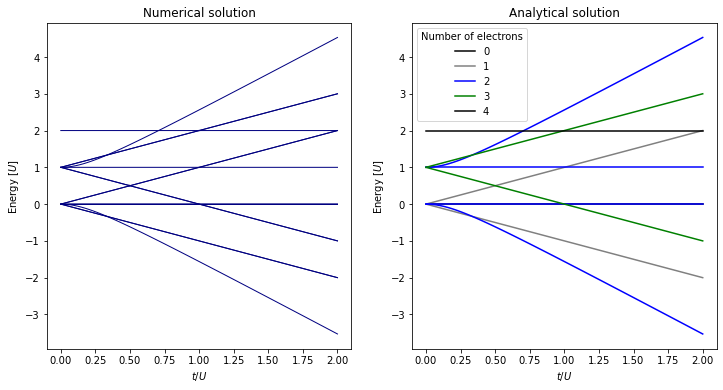

In [5]:
plt.figure(figsize = (12, 6))

plt.subplot(1,2,1)

plt.plot(x_list, energies, c = 'navy', linewidth = 1)
plt.xlabel(r'$t/U$')
plt.ylabel(r'Energy $[U]$')
plt.title(r'Numerical solution')


plt.subplot(1,2,2)


#vac
plt.plot(x_list, [0]*100, c = 'black', label = '0')

#1e
plt.plot(x_list, x_list, c = 'gray', label = '1')
plt.plot(x_list, -x_list, c = 'gray')

#2e
plt.plot(x_list, [0]*100, c = 'blue', label = '2')
plt.plot(x_list, [1]*100, c = 'blue')
plt.plot(x_list, 0.5*(1+np.sqrt(1+16*x_list**2)), c = 'blue')
plt.plot(x_list, 0.5*(1-np.sqrt(1+16*x_list**2)), c = 'blue')

#3e
plt.plot(x_list, 1 + x_list, c = 'green', label = '3')
plt.plot(x_list, 1 - x_list, c = 'green')

#4e
plt.plot(x_list, [2]*100, c = 'black', label = '4')

plt.xlabel(r'$t/U$')
plt.ylabel(r'Energy $[U]$')
plt.title(r'Analytical solution')

plt.legend(title = 'Number of electrons')

plt.show()

### Two site Heisenberg model

$$H = J\vec{S_1} \cdot \vec{S_2}$$

#### Analytical solution

Total spin operator $\vec S = \vec{S_1} + \vec{S_2}$ commutes with $H$, so the eigenstates are spin eigenstates:
- $\ket{\Psi_0^0} = \frac{1}{\sqrt 2}\left(\ket{\uparrow \downarrow} - \ket{\downarrow \uparrow}\right)$
- $\ket{\Psi_{+1}^1} = \ket{\uparrow \uparrow}$
- $\ket{\Psi_0^1} = \frac{1}{\sqrt 2}\left(\ket{\uparrow \downarrow} + \ket{\downarrow \uparrow}\right)$
- $\ket{\Psi_{-1}^1} = \ket{\downarrow \downarrow}$

The spin 0 state has energy $E_0 = -3J/4$ and all the spin 1 states have energy $E_1 = J/4$.

#### Numerical solution

In [6]:
def heisenberg_2s_hamiltonian(J):
    ham = \
    openfermion.QubitOperator('X0 X1', J/4) + \
    openfermion.QubitOperator('Y0 Y1', J/4) + \
    openfermion.QubitOperator('Z0 Z1', J/4)
    return ham

In [7]:
heisenberg_2s_hamiltonian(4)

1.0 [X0 X1] +
1.0 [Y0 Y1] +
1.0 [Z0 Z1]

In [8]:
openfermion.eigenspectrum(heisenberg_2s_hamiltonian(4))

array([-3.,  1.,  1.,  1.])

### Atomic limit


In the atomic limit -- $x = \frac{t}{U} << 1$.

#### Using the exact solution

$$
\frac{1}{2} \left( U + \sqrt{U^2 + 16t^2} \right) =
\frac{U}{2} \left( 1 + \sqrt{1 + (4t/U)^2} \right) \approx
U + \frac{4t^2}{U}
$$
$$
\frac{1}{2} \left( U - \sqrt{U^2 + 16t^2} \right) =
\frac{U}{2} \left( 1 - \sqrt{1 + (4t/U)^2} \right) \approx
- \frac{4t^2}{U}
$$

So the spectrum  of the Hubbard model for 2 electrons is (in the units of $U$):
$$
- 4x^2,
0, 0, 0,
1,
1 + 4x^2
$$

The low energy spectrum is $- 4x^2, 0, 0, 0 $, equivalent to $H_{Heisenberg} - J/4$ with $J = \frac{4t^2}{U}$


#### Using perturbation theory

$\mathcal H_0$ = states with 2 electrons and unperturbed energy 0 are
$\ket{\Psi_{+1}^1}, \ket{\Psi_{0}^1}, \ket{\Psi_{-1}^1}, \ket{\Psi_{HL}}$.

$$H_1\ket{\Psi_{HL}} = -2t\ket{\Psi_{+}}$$
and $H_1\ket\lambda = 0$ for other states in $\mathcal H_0$.

The first order correction to the ground states energy is 0 for all states.
The second order is non-zero only for $\ket{\Psi_{HL}}$.
$$E_{HL}^{(2)} =
\sum_{E_\rho^{(0)} \neq E_{HL}^{(0)}} \frac{|\bra\rho H_1 \ket{\Psi_{HL}} |^2}{E_\lambda^{(0)} - E_\rho^{(0)}} =
 \frac{|\bra{\Psi_+} H_1 \ket{\Psi_{HL}} |^2}{E_{HL}^{(0)}- E_+^{(0)}} = \frac{|-2t|^2}{0 - U} = \frac{-4t^2}{U}.$$
 
 So the low energy spectrum is $\frac{-4t^2}{U}, 0,0,0$.

#### Numerically

In [9]:
hub_energies = []
hei_energies = []
x_list = np.linspace(0, 0.2, 100)
for x in x_list:
    hub_energies.append(openfermion.eigenspectrum(hubbard_2s_hamiltonian(U = 1, t = x)))
    hei_energies.append(openfermion.eigenspectrum(heisenberg_2s_hamiltonian(J = 4*x**2)) - x**2)

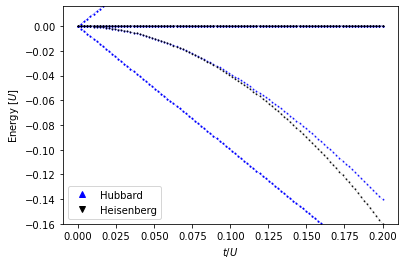

In [10]:
plt.plot(x_list, hub_energies, c = 'blue', marker = '^', markersize = 1, linewidth = 0.1)
plt.plot(x_list, hei_energies, c = 'black', marker = 'v', markersize = 1, linewidth = 0.1)
plt.plot([], c = 'blue', label = 'Hubbard', marker = '^', linewidth = 0)
plt.plot([], c = 'black', label = 'Heisenberg', marker = 'v', linewidth = 0)
plt.xlabel(r'$t/U$')
plt.ylabel(r'Energy $[U]$')
plt.ylim(np.min(hei_energies), -np.min(hei_energies)/10)
plt.legend()
plt.show()

## Other examples

In [11]:
def build_syst(lat, sites, onsite = 1, hopping = 1):
    syst = kwant.Builder()
    syst[(lat(*site) for site in sites)] = onsite
    syst[lat.neighbors()] = hopping
    syst = syst.finalized()
    return syst
    
def plot_syst(lat, sites):
    syst = build_syst(lat, sites)
    kwant.plot(syst)

def num_pairs(lat, sites):
    syst = build_syst(lat, sites)
    return syst.graph.num_edges//2

In [12]:
def hubbard_hamiltonian(t, U, lat, sites,
                        hopping_matrix = sigma_0):
    syst = build_syst(
        lat = lat,
        sites = sites,
        onsite = 0*sigma_0,
        hopping = -t*hopping_matrix
    )
    ham, ind = system_to_FermionOperator(syst, return_indexer = True)
    ham += hubbard_interaction(ind = ind, U = U)
    return ham
    
def heisenberg_hamiltonian(J, lat, sites,
                          interaction_matrix = 0.25*(
                              np.kron(sigma_x, sigma_x)+
                              np.kron(sigma_y, sigma_y)+
                              np.kron(sigma_z, sigma_z))):
    syst = build_syst(
        lat = lat,
        sites = sites,
        onsite = 0*sigma_0,
        hopping = J*interaction_matrix
    )
    ham = system_to_QubitOperator(syst)
    return ham

In [13]:
def hubbard_heisenberg_spectra(hub_fun, hei_fun, x_list):
    
    n_pairs = num_pairs(lat, sites)
    
    hub_energies = []
    hei_energies = []
    for x in tqdm(x_list):
        hub_energies.append(
            openfermion.eigenspectrum(
                hub_fun(U = 1, t = x)
            ))
        hei_energies.append(
            openfermion.eigenspectrum(
                hei_fun(J = 4*x**2)
            ) - x**2*n_pairs)
    return hub_energies, hei_energies

In [14]:
def plot_spectra(hub_energies, hei_energies, x_list):
    plt.plot(x_list, hub_energies, c = 'blue', marker = '^', markersize = 1, linewidth = 0.1)
    plt.plot(x_list, hei_energies, c = 'black', marker = 'v', markersize = 1, linewidth = 0.1)
    plt.plot([], c = 'blue', label = 'Hubbard', marker = '^', linewidth = 0)
    plt.plot([], c = 'black', label = 'Heisenberg', marker = 'v', linewidth = 0)
    plt.xlabel(r'$t/U$')
    plt.ylabel(r'Energy $[U]$')
    plt.ylim(np.min(hei_energies), -np.min(hei_energies)/10)
    plt.legend()
    plt.show()

### Chain

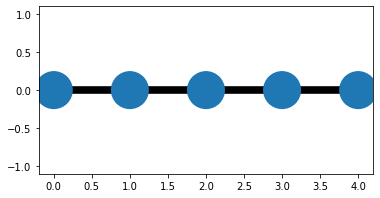

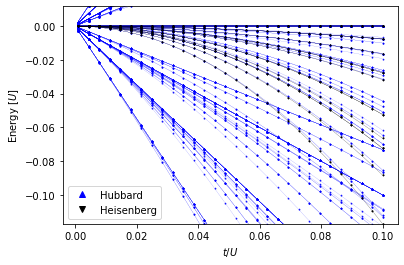

In [15]:
n_sites = 5
x_max = 0.1

lat = kwant.lattice.chain()
sites = [(n,) for n in range(n_sites)]

x_list = np.linspace(x_max/100, x_max, 30)

plot_syst(lat, sites)
hub_energies, hei_energies = hubbard_heisenberg_spectra(
    lambda t,U: hubbard_hamiltonian(t, U, lat, sites),
    lambda J: heisenberg_hamiltonian(J, lat, sites),
    x_list)
plot_spectra(hub_energies, hei_energies, x_list)

### Square

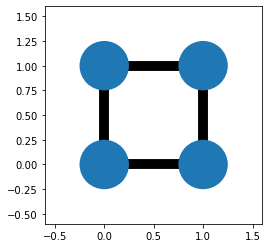

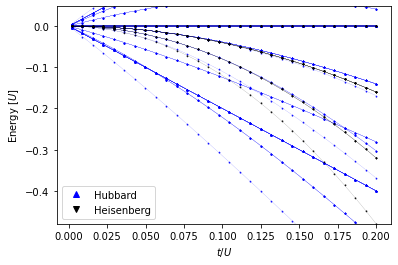

In [16]:
x_max = 0.2

lat = kwant.lattice.square()
sites = [(x,y) for x in range(2) for y in range(2)]

x_list = np.linspace(x_max/100, x_max, 30)

plot_syst(lat, sites)
hub_energies, hei_energies = hubbard_heisenberg_spectra(
    lambda t,U: hubbard_hamiltonian(t, U, lat, sites),
    lambda J: heisenberg_hamiltonian(J, lat, sites),
    x_list)
plot_spectra(hub_energies, hei_energies, x_list)

### Triangle

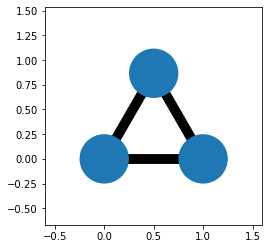

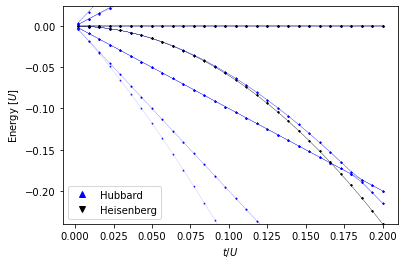

In [17]:
x_max = 0.2

lat = kwant.lattice.triangular()
sites = [(0,0), (0,1), (1,0)]

x_list = np.linspace(x_max/100, x_max, 30)

plot_syst(lat, sites)
hub_energies, hei_energies = hubbard_heisenberg_spectra(
    lambda t,U: hubbard_hamiltonian(t, U, lat, sites),
    lambda J: heisenberg_hamiltonian(J, lat, sites),
    x_list)
plot_spectra(hub_energies, hei_energies, x_list)

## Generalisation?

Can we replace the hopping part of the Hubbard hamiltonian by a general tight binding model:
$$H = -\sum_{i,j}
\begin{bmatrix}
c_{i, \uparrow}\\
c_{i, \downarrow}
\end{bmatrix}^\dagger
\begin{bmatrix}
t_{i,j, \uparrow, \uparrow}  &
t_{i,j, \downarrow, \uparrow}\\
t_{i,j, \uparrow, \downarrow} & 
t_{i,j, \downarrow, \downarrow}
\end{bmatrix}
\begin{bmatrix}
c_{j, \uparrow}\\
c_{j, \downarrow}
\end{bmatrix}
+ U \sum_i n_{i, \uparrow}n_{i,_\downarrow}$$
and repeat the same procedure to get more general spin lattice models:
$$H = \sum_i\vec h_i \cdot \vec S_i+\sum_{i,j}\vec S_i J_{i,j}\vec S_j,$$
where $J_{i,j}$ is a $3\times3$ matrix?

$$H_1 = -\sum_{i,j}\sum_{\sigma, \sigma'}
t_{i,j,\sigma,\sigma'}c_{i,\sigma}^\dagger c_{j, \sigma'}$$
$$H_1^2 = 
\sum_{i,j,k,l}\sum_{\sigma, \sigma', \rho, \rho'}
t_{i,j, \sigma, \sigma'}t_{k,l, \rho, \rho'}
c_{i, \sigma}^\dagger
c_{j, \sigma'}
c_{k, \rho}^\dagger
c_{l, \rho'}
$$

### Test - two-site model

Before doing the general calculation let's test for a simple model:
two site hamiltonian with "hopping" between opposite spins and onsite interaction:
$$H = -t\left(
c_{A\uparrow}^\dagger c_{B\downarrow} +
c_{A\downarrow}^\dagger c_{B\uparrow} +
c_{B\uparrow}^\dagger c_{A\downarrow} +
c_{B\downarrow}^\dagger c_{A\uparrow}\right) +
U \left(
n_{A\uparrow} n_{A\downarrow} +
n_{B\uparrow} n_{B\downarrow}\right).$$
Putting
$$t_{i,j,\sigma,\sigma'} = t(1-\delta_{i,j})(1-\delta_{\sigma, \sigma'})$$
into eq. (42) we get
$$H_{eff} =
\frac{-t^2}{U}\Pi_0
\sum_{i\neq j}\sum_{\sigma,\rho}
c_{i, \sigma}^\dagger
c_{i, -\rho}
c_{j, -\sigma}
c_{j, \rho}^\dagger
\Pi_0
=\\=
\frac{-t^2}{U}\Pi_0
\sum_{i\neq j}\sum_{\sigma}
\left(
c_{i, \sigma}^\dagger
c_{i, -\sigma}
c_{j, -\sigma}
c_{j, \sigma}^\dagger
+
c_{i, \sigma}^\dagger
c_{i, \sigma}
c_{j, -\sigma}
c_{j, -\sigma}^\dagger
\right)
\Pi_0
=\\=
\frac{-t^2}{U}\Pi_0
\sum_{i\neq j}\sum_{\sigma}
\left(
-c_{i, \sigma}^\dagger
c_{i, -\sigma}
c_{j, \sigma}^\dagger
c_{j, -\sigma}
+
n_{i, \sigma}
(1-n_{j, -\sigma})
\right)
\Pi_0
=\\=
\frac{t^2}{U}\Pi_0
\sum_{i\neq j}\sum_{\sigma}
\left(
c_{i, \sigma}^\dagger
c_{i, -\sigma}
c_{j, \sigma}^\dagger
c_{j, -\sigma}
+
n_{i, \sigma}
n_{j, -\sigma}
-\frac{1}{2}
\right)
\Pi_0
=\\=
\frac{2t^2}{U}\Pi_0
\sum_{\sigma}
\left(
c_{A, \sigma}^\dagger
c_{A, -\sigma}
c_{B, \sigma}^\dagger
c_{B, -\sigma}
+
n_{A, \sigma}
n_{B, -\sigma}
-\frac{1}{2}
\right)
\Pi_0$$
where I again used the usual commutation relations and the fact that $\sum_\sigma n_{i,\sigma} = 1$ inside $\mathcal H_0$.

Performing explicitly the sum over $\sigma$ and rewriting in terms of spin operators yields
$$
H_{eff}
=\\=
\frac{2t^2}{U}\Pi_0
\left(
S_A^+ S_B^+
+
S_A^- S_B^-
+
\frac{1}{4}(1+S_A^z)(1-S_B^z)
+
\frac{1}{4}(1-S_A^z)(1+S_B^z)
-1
\right)\Pi_0
=\\=
\frac{2t^2}{U}\Pi_0
\left(
\frac{1}{4}(S_A^x + iS_A^y)(S_B^x +i S_B^y)
+
\frac{1}{4}(S_A^x - iS_A^y)(S_B^x - i S_B^y)
+\frac{1}{2}
-
\frac{1}{2}S_A^z S_B^z
-1
\right)\Pi_0
=\\=
\frac{t^2}{U}\Pi_0
\left(
S_A^x S_B^x 
- S_A^y S_B^y
- S_A^z S_B^z
-1
\right)\Pi_0$$

We get
$$H_{eff} = \frac{t^2}{U} \vec S_A
\begin{bmatrix}
1 &&\\
&-1&\\
&&-1
\end{bmatrix}
\vec S_B - \frac{t^2}{U}
=\\=
\frac{t^2}{4U}\left( X_A X_B - Y_A Y_B - Z_A Z_B\right)
-\frac{t^2}{U}$$

In [18]:
lat = kwant.lattice.chain()
sites = [(n,) for n in range(2)]
x_list = np.linspace(0.001, 0.2, 30)
    
hub_energies, hei_energies = hubbard_heisenberg_spectra(
    lambda t,U: hubbard_hamiltonian(t, U, lat, sites, sigma_x),
    lambda J: heisenberg_hamiltonian(J, lat, sites,
                                     0.25*(np.kron(sigma_x, sigma_x)-np.kron(sigma_y, sigma_y)-np.kron(sigma_z, sigma_z))),
    x_list)

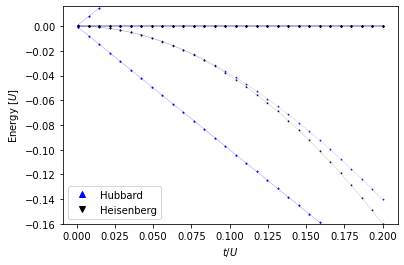

In [19]:
plot_spectra(hub_energies, hei_energies, x_list)

### Kitaev honeycomb

simple guess doesn't work

In [20]:
def kit_fermion_ham(t, U):
    lat = kwant.lattice.honeycomb()
    syst = kwant.Builder()
    sites = [lat.sublattices[0](0,0),
             lat.sublattices[0](0,1),
             lat.sublattices[0](1,0),
             lat.sublattices[1](0,0),
             lat.sublattices[1](1,0),
             lat.sublattices[1](1,-1)
            ]
    syst[sites] = 0*sigma_0
    #for hopping, pauli_matrix in zip(lat.neighbors(), [sigma_x, sigma_y, sigma_z]):
    #    syst[hopping] = -t * pauli_matrix
    hoppings = lat.neighbors()
    syst[hoppings[0]] = -t * np.array([[1,1],[1,-1]])/np.sqrt(2)
    syst[hoppings[1]] = -t * np.array([[1-1j,-1+1j],[1+1j,1+1j]])/2
    syst[hoppings[2]] = -t * sigma_0

    syst = syst.finalized()

    hub_ham = system_to_FermionOperator(syst)
    for i in range(len(sites)):
            hub_ham += openfermion.FermionOperator(f'{2*i}^ {2*i} {2*i+1}^ {2*i+1}', U)
    return(hub_ham)

In [21]:
kit_fermion_ham(1,0)

(-0.5+0.5j) [0^ 6] +
(0.5-0.5j) [0^ 7] +
-1.0 [0^ 8] +
(-0.5-0.5j) [1^ 6] +
(-0.5-0.5j) [1^ 7] +
-1.0 [1^ 9] +
-0.7071067811865475 [2^ 6] +
-0.7071067811865475 [2^ 7] +
-1.0 [2^ 10] +
-0.7071067811865475 [3^ 6] +
0.7071067811865475 [3^ 7] +
-1.0 [3^ 11] +
-0.7071067811865475 [4^ 8] +
-0.7071067811865475 [4^ 9] +
(-0.5+0.5j) [4^ 10] +
(0.5-0.5j) [4^ 11] +
-0.7071067811865475 [5^ 8] +
0.7071067811865475 [5^ 9] +
(-0.5-0.5j) [5^ 10] +
(-0.5-0.5j) [5^ 11] +
(-0.5-0.5j) [6^ 0] +
(-0.5+0.5j) [6^ 1] +
-0.7071067811865475 [6^ 2] +
-0.7071067811865475 [6^ 3] +
(0.5+0.5j) [7^ 0] +
(-0.5+0.5j) [7^ 1] +
-0.7071067811865475 [7^ 2] +
0.7071067811865475 [7^ 3] +
-1.0 [8^ 0] +
-0.7071067811865475 [8^ 4] +
-0.7071067811865475 [8^ 5] +
-1.0 [9^ 1] +
-0.7071067811865475 [9^ 4] +
0.7071067811865475 [9^ 5] +
-1.0 [10^ 2] +
(-0.5-0.5j) [10^ 4] +
(-0.5+0.5j) [10^ 5] +
-1.0 [11^ 3] +
(0.5+0.5j) [11^ 4] +
(-0.5+0.5j) [11^ 5]

In [22]:
def kit_qubit_ham(J):
    lat = kwant.lattice.honeycomb()
    syst = kwant.Builder()
    sites = [lat.sublattices[0](0,0),
             lat.sublattices[0](0,1),
             lat.sublattices[0](1,0),
             lat.sublattices[1](0,0),
             lat.sublattices[1](1,0),
             lat.sublattices[1](1,-1)
            ]

    syst = kwant.Builder()
    syst[sites] = 0*sigma_0
    for hopping, pauli_matrix in zip(lat.neighbors(), [sigma_x, sigma_y, sigma_z]):
        syst[hopping] = -J * np.kron(pauli_matrix, pauli_matrix)

    syst = syst.finalized()
    hei_ham = system_to_QubitOperator(syst)

    return hei_ham

In [23]:
x_list = np.linspace(0.001, 0.2, 5)

hub_energies, hei_energies = hubbard_heisenberg_spectra(kit_fermion_ham, kit_qubit_ham, x_list)

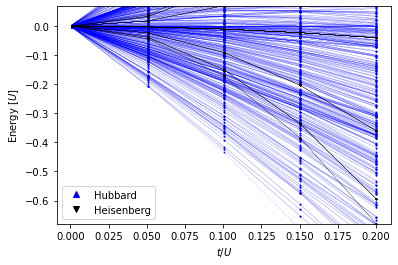

In [24]:
plot_spectra(hub_energies, hei_energies, x_list)